<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Copy_of_Asg11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
import cv2
import sys
from google.colab.patches import cv2_imshow


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


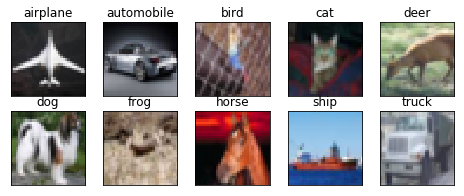

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Building the Model
<b>The Below model when compiled and trained achived accuracy of 84.33 % in just 15th Epoch and further achieved 86.36 % in 45th Epoch & 87.53 % in 89th Epoch


In [6]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 0.010211232 0.9708897
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy
                        

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))

# Compile the model
#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
__________

<b>Total params: 455,370

# Cut Out Image Augmentation Technique

Cut out is an Image augmentation technique that regularizes a model by randomly masking training images with random values.

## Implementation of Cut out
Source - https://github.com/yu4u/cutout-random-erasing/blob/master/random_eraser.py

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

## Create Image Generator using the custom Cut Out augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

# LR Finder

In [0]:
from keras.callbacks import Callback
class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

## FInding Learning Rate

### We find Best LR to train this model using ADAM optimizer for 1st Iteration

In [14]:
model1.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['accuracy'])

W0717 11:15:35.688898 140498147915648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/128))
#model1.fit(x_train, y_train, callbacks=[lr_finder] )

In [16]:
model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                     samples_per_epoch = train_features.shape[0], nb_epoch = 1, 
                     validation_data = (X_test, Y_test), verbose=1, callbacks = [lr_finder])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=1)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0717 11:15:42.942424 140498147915648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/te

Epoch 1/1
335/390 [========================>.....] - ETA: 2s - loss: 3.0779 - acc: 0.2807

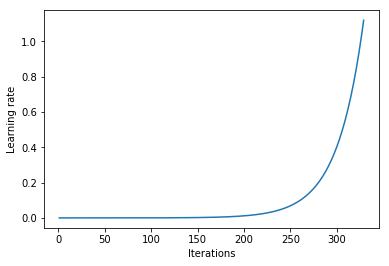

In [0]:
lr_finder.plot_lr()

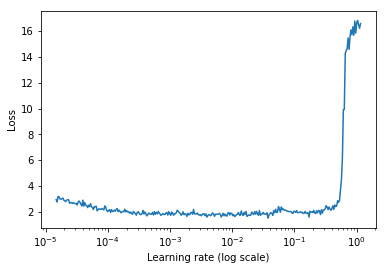

In [17]:
lr_finder.plot()

In [18]:
#finding the LR with maximum loss
import pandas as pd
pd.DataFrame(lr_finder.lrs,lr_finder.losses,columns = ['LR']).sort_index().head(1)

,LR
1.522446,0.037622


### Let us see what is the Best LR to train this model using SGD optimizer

Since we have to train the model using SGD with momentum, it will be preferale to find learning rate obtained from the LR_Finder iteration trained with SGD

In [25]:
#Compiling the model with SGD optimizer
sgd = optimizers.SGD( momentum=0.9, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd)

#LR finder on th compiled model with SGD
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/128))

#LR finder at work on the model
model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                     samples_per_epoch = train_features.shape[0], nb_epoch = 1, 
                     validation_data = (X_test, Y_test), verbose=1, callbacks = [lr_finder])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/1
381/390 [============================>.] - ETA: 0s - loss: 3.1521

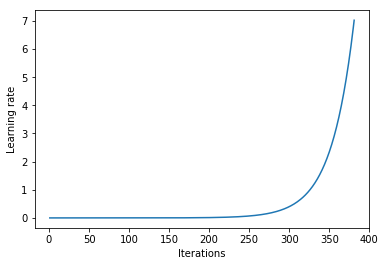

In [26]:
lr_finder.plot_lr()

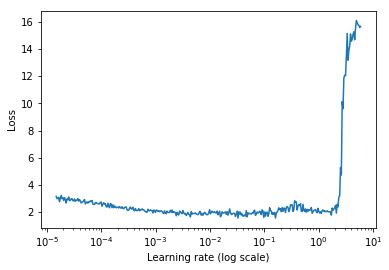

In [27]:
lr_finder.plot()

In [28]:
#finding the LR with maximum loss
import pandas as pd
pd.DataFrame(lr_finder.lrs,lr_finder.losses,columns = ['LR']).sort_index().head(1)

,LR
1.569486,0.032664


# Training using the LR from the LR finder

<b> LR = 0.032664

Model took 1158.85 seconds to train
Top validation accuracy obtained:87.78%


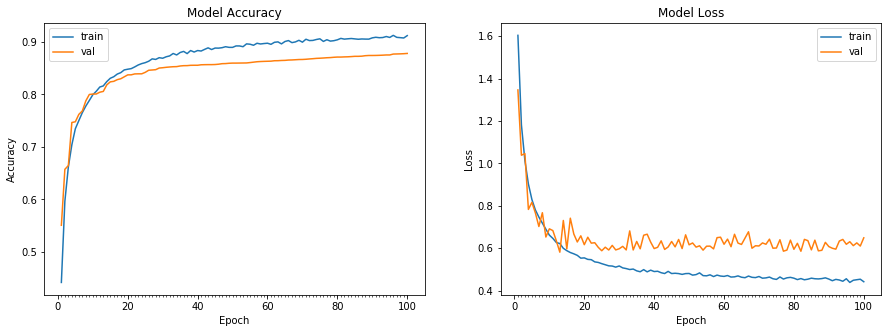

In [31]:
#compile the model with the LR
sgd = optimizers.SGD( lr = 0.032664,momentum=0.9, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

# start time
start = time.time()

# Train the model
model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), verbose=0, callbacks = callback_list)

#end time
end = time.time()


print ("Model took %0.2f seconds to train"%(end - start))
print("Top validation accuracy obtained:"+"{:.2%}".format(np.amax(model_info.history['val_acc'])))
# plot model history
plot_model_history(model_info)

<b>EDIT: Amit Doda - (Ran for 50 more epochs and achieved 87.53 % as shown below in 39th epoch (total 89th epoch))
  
### Current Achievement: With Cutout and LR finder we were able to beat the earlier validation accuracy of Amit Doda

# GradCAM

## Defining functions for implementation

### Predicting on the image

In [0]:
def test_img_predict(img,img_num):
  class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
  preds = model1.predict(img)
  actual_label = np.argmax(Y_test[img_num])
  class_idx = np.argmax(preds)
  class_output = model1.output[:, class_idx]
  print("Original Class:",class_names[actual_label],";", "Predicted Class:",class_names[class_idx] )
  return class_output

To check the map for the top prediction, we take the topmost class index.

### Selecting the output from the final convolution layer and computing gradient with class output

In [0]:
def gradient_FeatureHeatMap(last_conv_name, class_output, channel_num,img_pr):
  last_conv_layer = model1.get_layer(last_conv_name)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img_pr])
  for i in range(channel_num):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

We compute the gradient of the class output value with respect to the feature map. Then, we pool the gradients over all the axes leaving out the channel dimension. Finally, we weigh the output feature map with the computed gradient values. We also evaluate the heatmap by averaging the weighed feature map

### Defining the function to plot Gradient weighted Class Activation Map (GradCAM)

In [0]:
def plot_gradCAM(heatmap, img):  
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  img = np.uint8(255*img)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0) 
  fig=plt.figure(figsize=(5, 5))
  ax1 = fig.add_subplot(2,2,1)
  ax1.set_title('Original')
  ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax2 = fig.add_subplot(2,2,2)
  ax2.set_title('GradCAM')
  ax2.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
  plt.show()
  return superimposed_img

Adds the heatmap with the image with more weights to image. A superimposed image is obtained which has brighter pixels where the activation happens

## Finding 25 Misclassified images from the model

In [89]:
#Predicting on the test images
Y_pred = model1.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
y_test = np.argmax(Y_test, axis=1)
misclassified = []
for i in range(len(Y_test)):
  if(y_test[i]!=y_pred[i]):
    misclassified.append(i)
    if len(misclassified)==25:
      break


## Plotting GradCam for the Misclassified images

Original Class: frog ; Predicted Class: deer


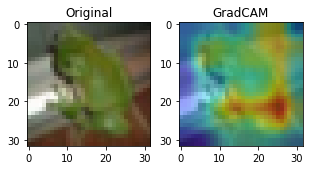

Original Class: bird ; Predicted Class: ship


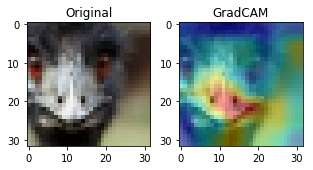

Original Class: automobile ; Predicted Class: truck


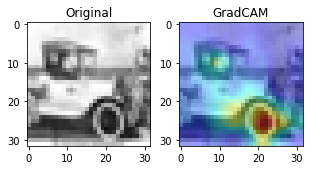

Original Class: dog ; Predicted Class: horse


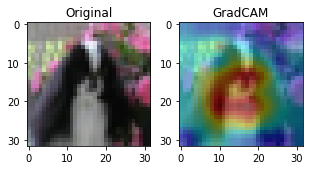

Original Class: frog ; Predicted Class: bird


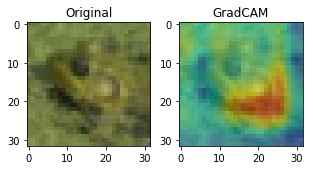

Original Class: cat ; Predicted Class: deer


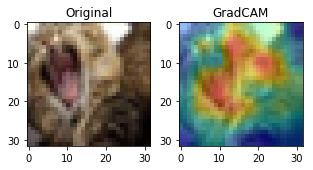

Original Class: deer ; Predicted Class: bird


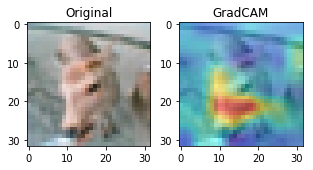

Original Class: frog ; Predicted Class: cat


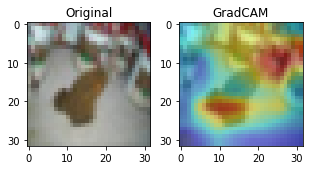

Original Class: cat ; Predicted Class: dog


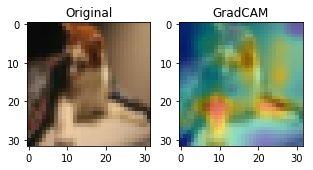

Original Class: cat ; Predicted Class: dog


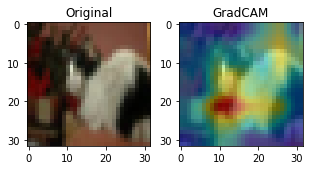

Original Class: dog ; Predicted Class: horse


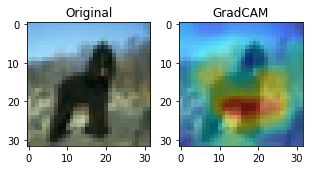

Original Class: bird ; Predicted Class: cat


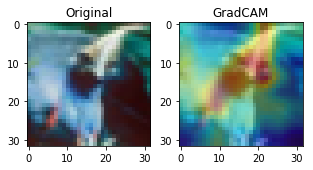

Original Class: cat ; Predicted Class: frog


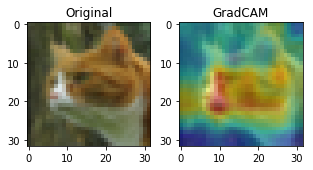

Original Class: frog ; Predicted Class: bird


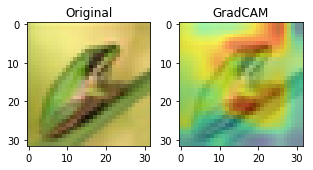

Original Class: airplane ; Predicted Class: truck


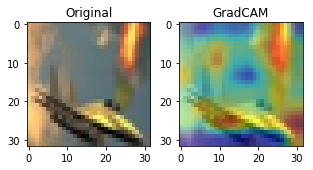

Original Class: dog ; Predicted Class: cat


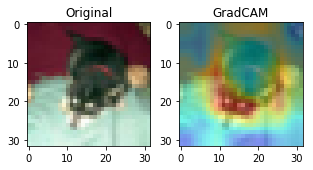

Original Class: cat ; Predicted Class: dog


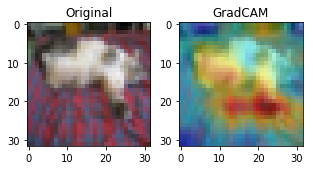

Original Class: dog ; Predicted Class: horse


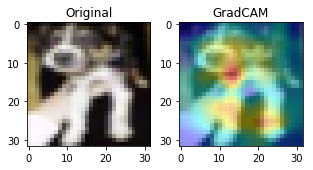

Original Class: bird ; Predicted Class: airplane


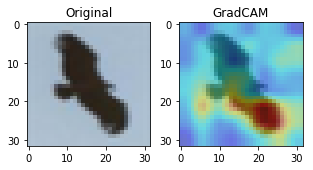

Original Class: deer ; Predicted Class: cat


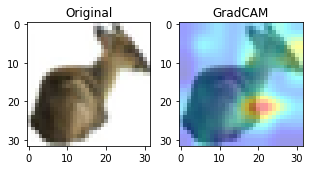

Original Class: automobile ; Predicted Class: truck


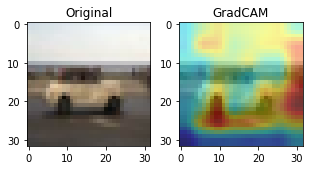

Original Class: cat ; Predicted Class: deer


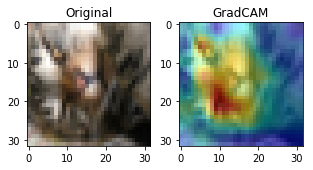

Original Class: frog ; Predicted Class: truck


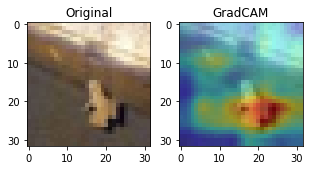

Original Class: horse ; Predicted Class: dog


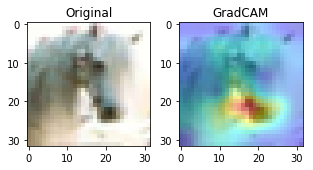

Original Class: frog ; Predicted Class: bird


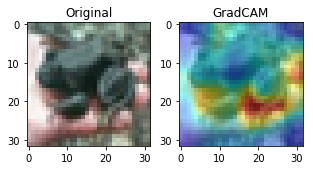

In [126]:
np.random.seed(123)
#np.random.seed(3)

for i in range(25):
  img_num = misclassified[i]
  img_acc = X_test[img_num]
  img_pr_acc = np.expand_dims(img_acc, axis=0)
  class_output = test_img_predict(img_pr_acc,img_num)
  img = test_features[img_num]
  img_pr = np.expand_dims(img, axis=0)
  heatmap = gradient_FeatureHeatMap("activation_20",class_output, 128,img_pr)
  gradCam = plot_gradCAM(heatmap,img)
  